# Visualización de datos con pandas/matplotlib

> La librería `pandas` se integra con `matplotlib` para permitir la visualización directa de Dataframes.
> A continuación veremos cómo generar distintos tipos de gráficos.

El primer paso es importar las librerías (pandas + librerías gráficas).

Igualmente configuraremos el cuaderno `jupyter` para mostrar los gráficos dentro de las celdas del cuaderno.
En este caso se permite el uso de "atajos" (_magic_), caracterizados por comenzar por el caracter `'%'`.

In [32]:
%matplotlib inline
# atajo `matplotlib` siempre antes de `import pandas`

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns  # opcional

En este punto podemos, opcionalmente, establecer diferentes parámetros gráficos, como el [estilo](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html), tamaño por defecto de las imágenes, etc.

In [34]:
sns.set()
# De forma alternativa, sin seaborn:
# plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams['font.family'] = ['monospace']

Dibujar directamente con `matplotlib` exige controlar cada uno de los detalles (color, etiquetas, título, ...)

## Ejemplo con `matplotlib`

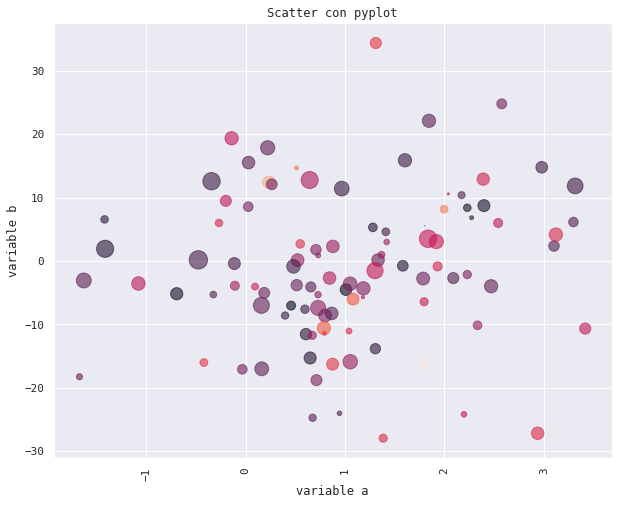

In [35]:
N = 100
np.random.seed(7384)

data = {'a': np.random.randn(N) + 1,
        'c': np.random.gamma(10, size=N),
        'd': np.random.randn(N) - 1}
data['b'] = data['a'] + 10 * np.random.randn(N)
data['d'] = np.abs(data['d']) * N

plt.scatter('a', 'b', s='d', c='c', data=data, alpha=0.6)
plt.xlabel('variable a')
plt.ylabel('variable b')
plt.xticks(rotation='vertical')
plt.title('Scatter con pyplot');

## Equivalente en `pandas`

True

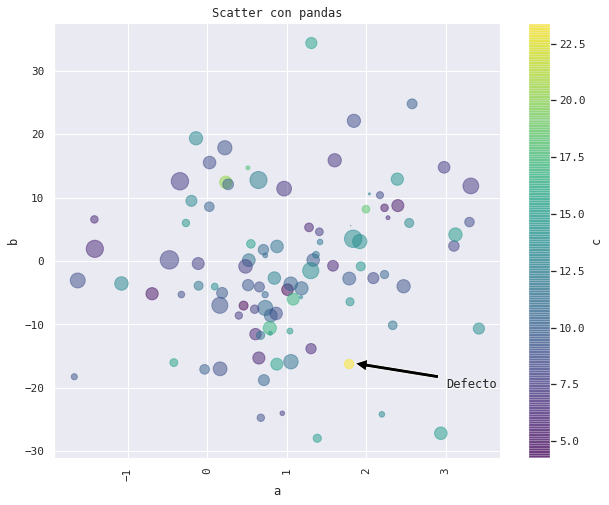

In [36]:
fig, ax = plt.subplots()

# Convertimos los datos anteriores a dataframe
df = pd.DataFrame.from_dict(data)

#####  Código equivalente con pandas
ax2 = df.plot.scatter(
    x='a', y='b',  # hacemos referencia a los nombres de las columnas en el dataframe
    c='c',  # columna con el color
    s=df['d'],  # s: tamaño
    colormap='viridis',  # gama de colores
    alpha=.5,  # nivel de transparencia de los puntos
    title='Scatter con pandas',  # título
    rot='vertical',  # rotación del texto en el eje x
    ax=ax  # dónde vamos a dibujar
)
#####


# Crea una anotación
ax.annotate(
    'Defecto', xy=(1.8, -16),
     xytext=(3, -20),
     arrowprops=dict(facecolor='black', shrink=0.05)
)

ax2 == ax

## Histograma

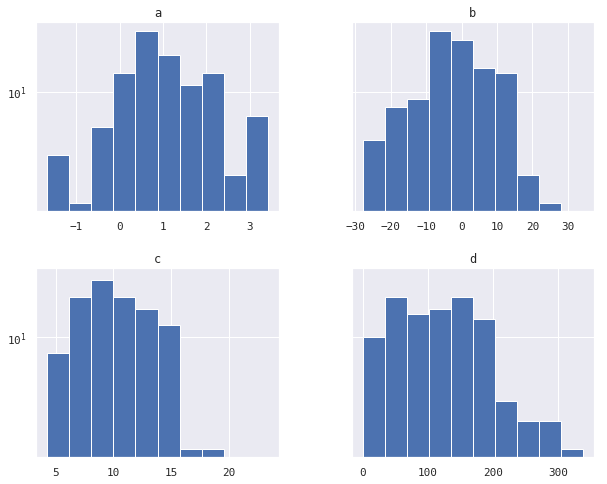

In [37]:
#####
df.hist(
    sharey=True,  # misma escala en el eje 'y'
    log=True  # escala log10
);  # finalizar con caracter ';' omite el texto de salida en los cuadernos jupyter
#####

## Gráfico de barras

In [45]:
# Obtención de datos

# origen_datos = 'http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/provi/03009.csv_sc'
origen_datos = '03009sc.csv'

marriages = pd.read_csv(origen_datos,
                        sep=';', encoding='latin-1',
                        na_values='..',
                        header=[4, 5], index_col=0)[:-2]
marriages.drop(marriages.columns[-1], axis=1, inplace=True)

meses = marriages.columns.get_level_values(0)[0::5].values.repeat(5)
marriages.columns = pd.MultiIndex.from_tuples(zip(meses, marriages.columns.get_level_values(1)))
provincias = ['Cantabria', 'Madrid', 'Murcia', 'León', 'Albacete']
df = marriages.Total.loc[provincias]
df

,Total,Según la religión católica,Exclusivamente civil,Según otra religión,No consta
Cantabria,2115.0,447.0,1510.0,14.0,144.0
Madrid,25298.0,6630.0,17992.0,113.0,563.0
Murcia,5152.0,1726.0,3385.0,35.0,6.0
León,1427.0,352.0,1042.0,5.0,28.0
Albacete,1375.0,479.0,885.0,9.0,2.0


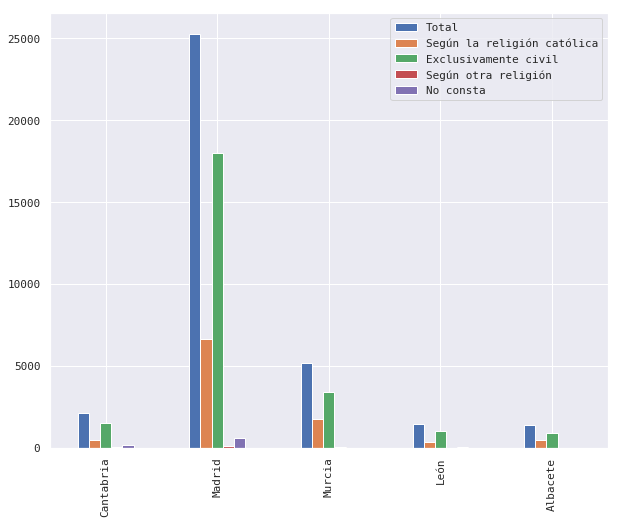

In [46]:
df.plot.bar();

### Otro ejemplo, apilando las columnas y añadiendo una tabla con los datos

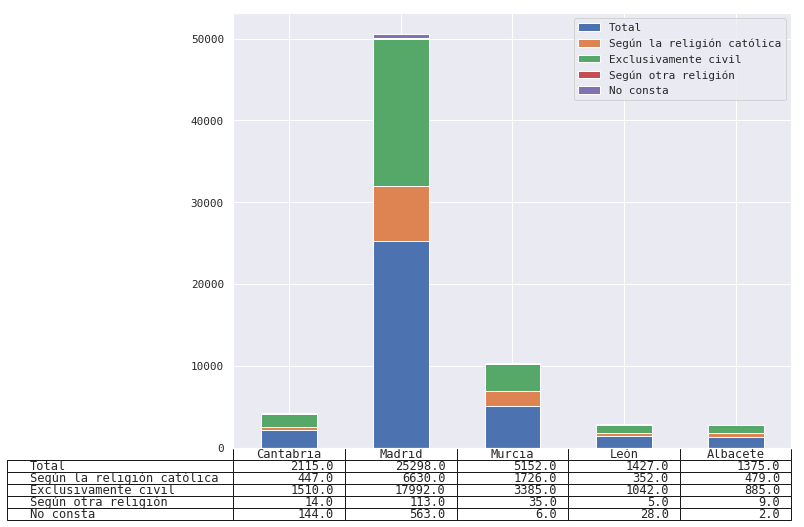

In [47]:
#####
ax = df.plot.bar(  # gráfico de barras
    stacked=True,  # apilar los datos de las columnas
    table=True     # añadir tabla con los datos
)
#####

ax.set_xticklabels([]);

## Series temporales (`line` con índice tipo `TimeSeries`)

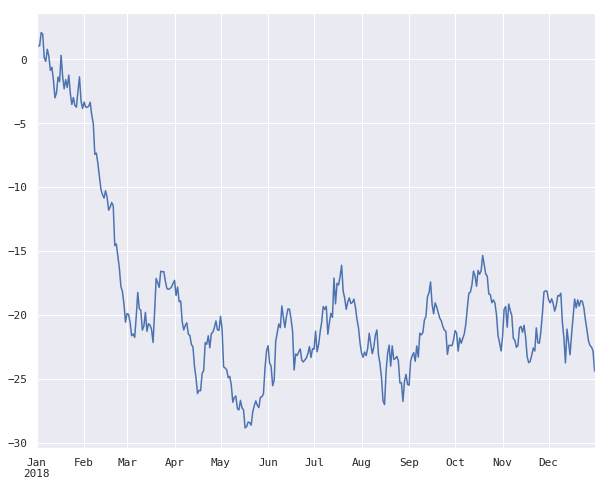

In [48]:
N = 365
np.random.seed(2983)  # reproducibilidad

# Crea datos
ts = pd.Series(np.random.randn(N),
               index=pd.date_range('1/1/2018', periods=N))
ts = ts.cumsum()

fig, ax = plt.subplots()  # igual que plt.subplots(1,1)

#####
ts.plot(ax=ax)  # dibuja sobre los ejes creados anteriormente
#####

ax.set_xlim((ts.index.min(), ts.index.max()));  # ajusta el eje 'x'


# plt.show()  # solamente fuera de jupyter

## Boxplots

/home/fernandezjm/.virtualenvs/prueba/lib/python3.7/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


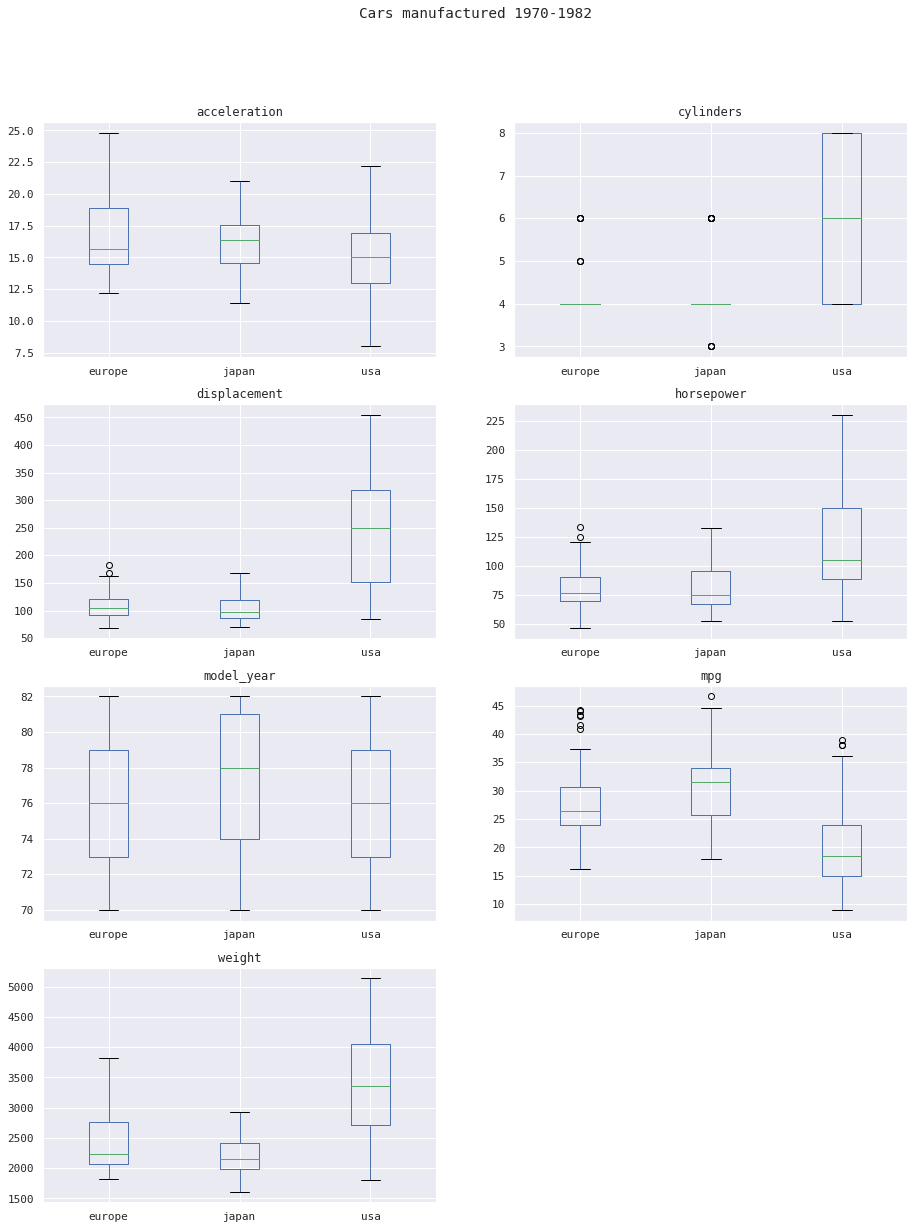

In [49]:
# Obtención de datos
df = sns.load_dataset('mpg')

# Crea una figura con 4 filas y 2 columnas y un tamaño de 15"x10"
fig, ax = plt.subplots(4, 2,
                       figsize=(15, 20))

# Número de subplots debe ser igual al número de variables (vamos a representar 7)
ax[-1, -1].axis('off')  # no dibujar el último
ax=ax.flatten()[:-1]  # eliminar el último de la lista

#####
df.boxplot(by='origin',  # dentro del dataframe, qué columna define el eje 'x'
           ax=ax)        # dónde dibujar (7 ejes creados anteriormente)
#####

fig.suptitle('Cars manufactured 1970-1982')  # título de la figura (completa)
_ = [_ax.set_xlabel('') for _ax in ax]  # omite etiqueta del eje 'x'


##### Probar resultado con la siguiente línea (dejando que pandas cree los 'Axes')
# df.boxplot(by='origin')

## Gráficos de área (`bar`)

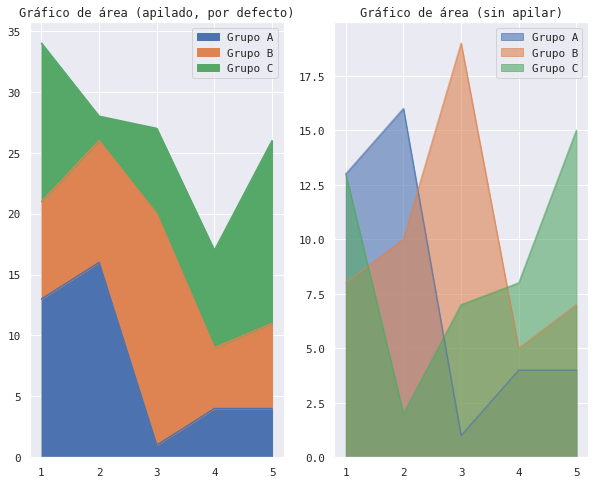

In [50]:
# Obtención de datos
np.random.seed(0)  # reproducibilidad
N = 5
datos = pd.DataFrame({'Grupo A': np.random.randint(1, 20, N),
                      'Grupo B': np.random.randint(1, 20, N),
                      'Grupo C': np.random.randint(1, 20, N)},
                      index=range(1, N+1))

# Crea figura y ejes
fig, (ax1, ax2) = plt.subplots(1, 2)  # 1 fila, 2 columnas

#####
datos.plot.area(
    title='Gráfico de área (apilado, por defecto)',  # tículo
    ax=ax1  # dónde dibujamos (primer eje)
)

datos.plot.area(
    stacked=False,  # por defecto los gráficos de área son apilados
    title='Gráfico de área (sin apilar)',  # título
    alpha=.6,  # nivel de transparencia
    ax=ax2  # dónde dibujamos (segundo eje)
);
#####

## Gráficos circulares (`pie`)

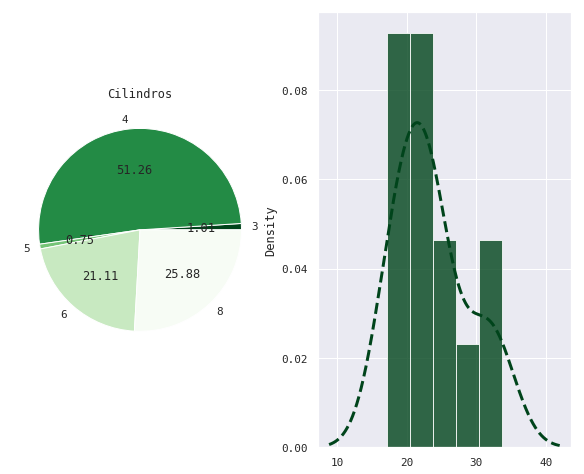

In [51]:
cmap = plt.cm.Greens_r  # paleta de colores

# Tratamiento de los datos
df1 = df.groupby(by='cylinders').count().name
df1.reset_index()

# Generamos subplots
ax = plt.subplot(121)

#####
ax = df1.plot.pie(
    cmap=cmap,         # mapa de colores (paleta)
    title='Cilindros', # título
    autopct='%.2f',    # formato del texto dentro de cada sector
    ax=ax              # dónde dibujar
)
#####

ax.set_ylabel('')  # omitimos etiqueta en el eje 'y'

ax = plt.subplot(122)
df2 = df.groupby('model_year').agg('mean').sort_values('weight')

df2.mpg.plot.hist(density=True, bins=5, alpha=.8, cmap=cmap, ax=ax)
df2.mpg.plot.kde(linewidth=3, style='--', cmap=cmap, ax=ax);

## Paleta de colores


En `matplotlib` usaremos

plt.set_cmap('Reds')

o bien, cada vez que dibujemos:

~~~python
cmap = plt.cm.Reds
data.plot.scatter(x, y, cm=cmap)
~~~

En `seaborn`:

Global:
~~~python
sns.set_palette(sns.color_palette('Reds'))
~~~

Temporal:
~~~python
with sns.color_palette('Greens'):
    ...
~~~

Para crear varios gráficos superpuestos, almacenaremos el eje (`ax`) donde dibujar

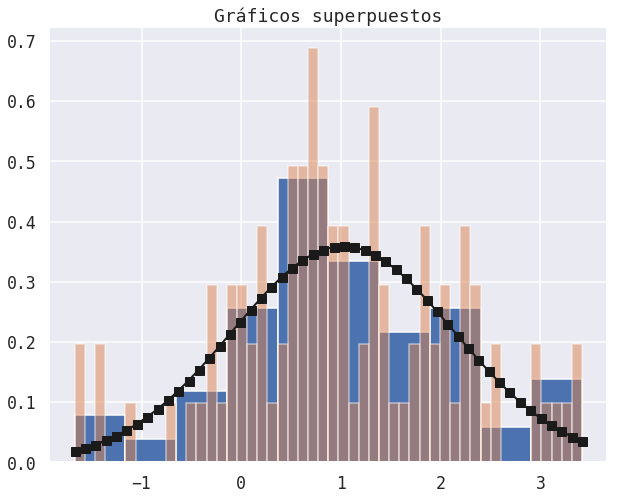

In [52]:
df = pd.DataFrame.from_dict(data)  # recuperamos dataframe anterior

with sns.plotting_context("talk", rc={"lines.linewidth": 2}):  # estilos (colores) para este gráfico

    bins = 50  # número de columnas en el histograma
    ax = df.hist('a', density=1)  # creado directamente, por defecto bins=10
    df.hist('a', bins=bins, density=1, alpha=.5, ax=ax)  # redibujamos sobre 'ax'

    x = np.linspace(
        df.a.min(),
        df.a.max(),
        bins
    )
    y = (1 / (np.sqrt(2 * np.pi) * df.a.std())) * \
        np.exp(-0.5 * (1 / df.a.std() * (x - df.a.mean()))**2)

    plt.plot(x, y, 'ks-');  # pyplot dibuja sobre la figura activa, de haberla
    plt.title('Gráficos superpuestos');

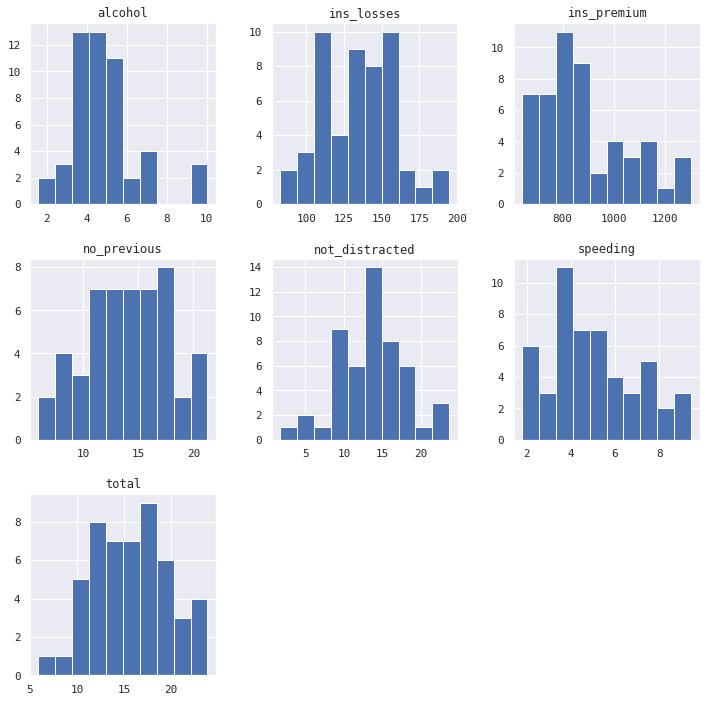

In [53]:
crashes = sns.load_dataset('car_crashes')
crashes.hist(figsize=(12, 12));